In [39]:
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
import pandas as pd

In [ ]:
instrumental_format_set_df = pd.read_csv("/Users/fernando/Downloads/4791394/rhythm_set.csv", encoding="latin1", sep=";")
beat_annotations_folder = "/Users/fernando/Downloads/data/Transcriptions/rh_0001/"

In [77]:
instrumental_format_set_df.head()

,Filename,Title,Genre,Composer,Time signature,Presence of bass,Kind of bass,Meter tag,Collection,Date,...,Sampling rate,Bits,Duration,Channels,Madmon Obs,Essentia Obs,BPM(0),BPM(1),Mono,Channel correlation
0,rh_0001.wav,Mimí,bambuco,Carlos Rosso Manrique,6/8,0.0,NaN,1.0,LUB,NaN,...,96000.0,24.0,"19,49",2.0,NaN,NaN,181.0,121.0,0.0,"0,571"
1,rh_0002.wav,Campanitas de mi pueblo,bambuco,Luis Uribe Bueno,6/8,0.0,NaN,1.0,LUB,NaN,...,96000.0,24.0,"18,81",2.0,NaN,NaN,154.0,102.0,0.0,"0,757"
2,rh_0003.wav,El espinaluno,bambuco,Carlos Alberto Rosso Manrique,6/8,0.0,NaN,1.0,LUB,NaN,...,96000.0,24.0,"16,47",2.0,Identifies almost all the beats until the coda...,Essentia detects all the beats,213.0,142.0,0.0,"0,54"
3,rh_0004.wav,Gladys,guabina,Mario Martínez,3/4,0.0,NaN,0.0,LUB,NaN,...,96000.0,24.0,"17,42",2.0,NaN,NaN,134.0,0.0,0.0,"-0,045"
4,rh_0005.wav,Blanquita,pasillo,Luis A. Calvo,3/4,0.0,NaN,0.0,LUB,NaN,...,96000.0,24.0,"16,49",2.0,NaN,NaN,178.0,0.0,0.0,"0,481"


In [ ]:
instrumental_format_set_df[[
    "Filename",
    "Title",
    "Nr. of instruments",
    "Guitar",
    "Bandola",
    "Tiple",
    "Bass",
    "Female voice",
    "Male voice",
    "Percussion",
    "Tempo"
]]

In [ ]:
dataset_files_directory = "/Users/fernando/Downloads/4791394/rhythm_set/Audio/"
audio_filename = "rh_0001.wav"
audio_filepath = dataset_files_directory + audio_filename
x, sr = librosa.load(audio_filepath)
ipd.Audio(x, rate=sr)

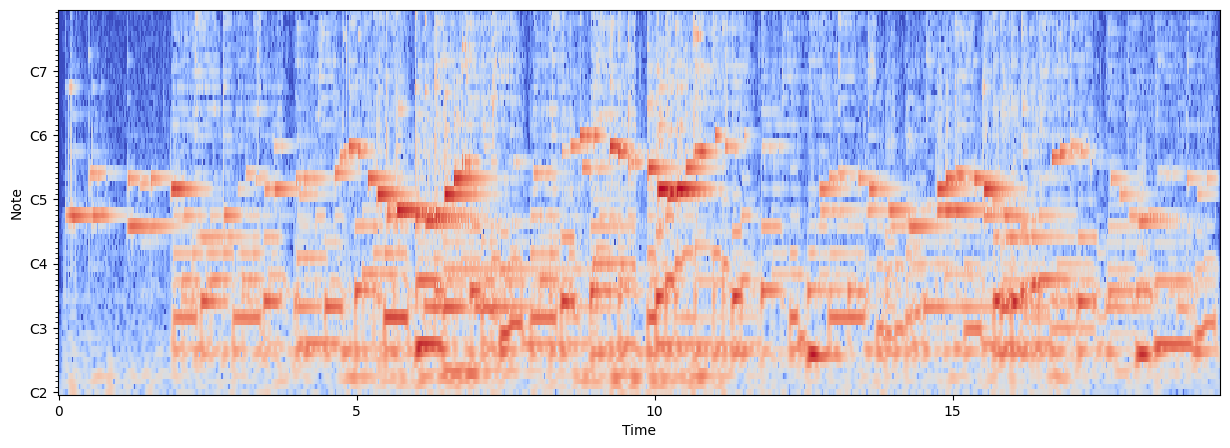

In [81]:
fmin = librosa.midi_to_hz(36)
hop_length = 512
C = librosa.cqt(x, sr=sr, fmin=fmin, n_bins=72, hop_length=hop_length)

logC = librosa.amplitude_to_db(numpy.abs(C))
plt.figure(figsize=(15, 5))
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm')

In [82]:
fmin

np.float64(65.40639132514966)

# Chroma sfft

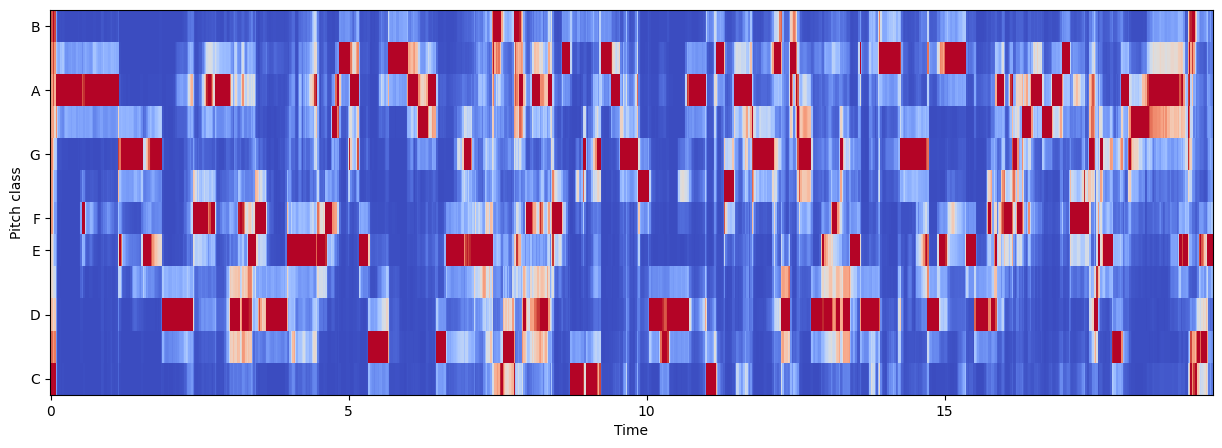

In [83]:
chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

# Chroma CQT

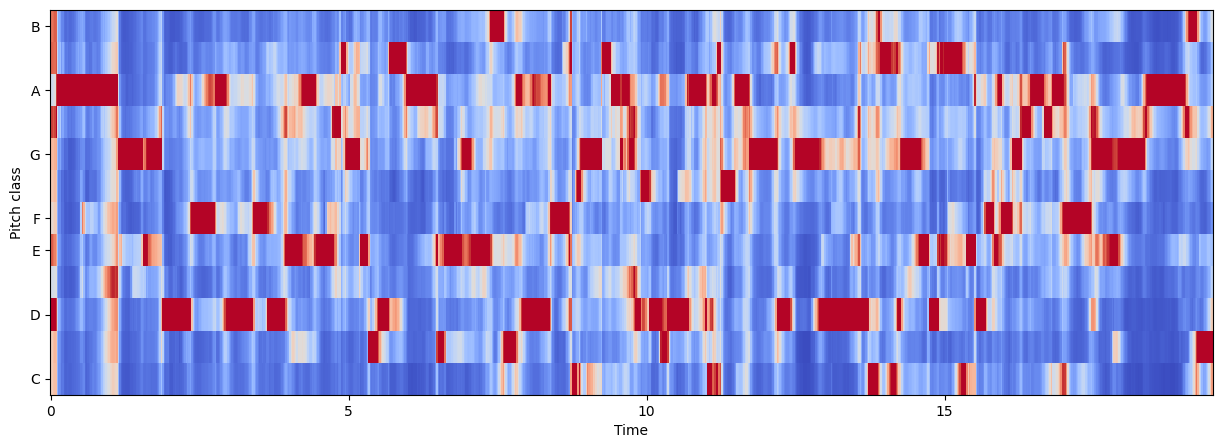

In [84]:
chromagram = librosa.feature.chroma_cqt(y=x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

(0.0, 1337.0)

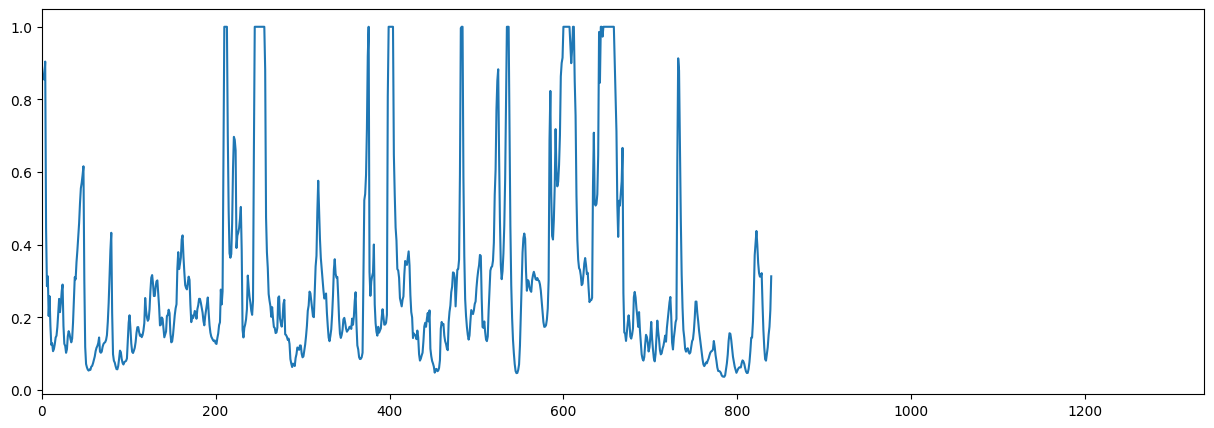

In [85]:
plt.figure(figsize=(15, 5))
plt.plot(chromagram[10])
plt.xlim(0, 1337)

In [86]:
1337 * 512 / sr

31.045079365079363

# Chrome Cens

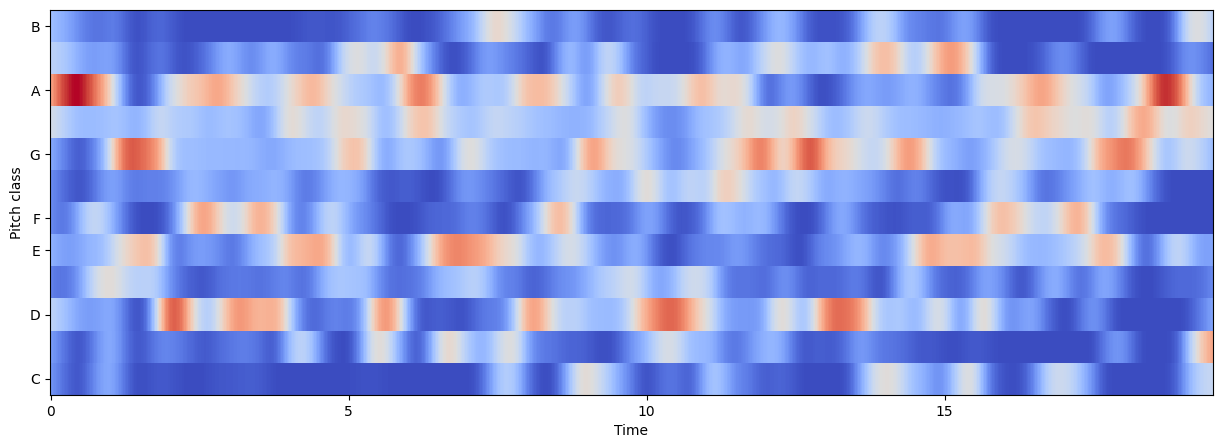

In [87]:
chromagram = librosa.feature.chroma_cens(y=x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [90]:
def load_beat_annotations(track_filename, beat_annotations_folder):
    beat_annotations_filename = track_filename.replace(".wav", ".txt")
    beat_annotations_filepath = beat_annotations_folder + beat_annotations_filename
    # load txt file, every line is a beat in seconds
    beats_times = []
    with open(beat_annotations_filepath, "r") as f:
        for line in f:
            beats_times.append(float(line.strip()))

    return beats_times

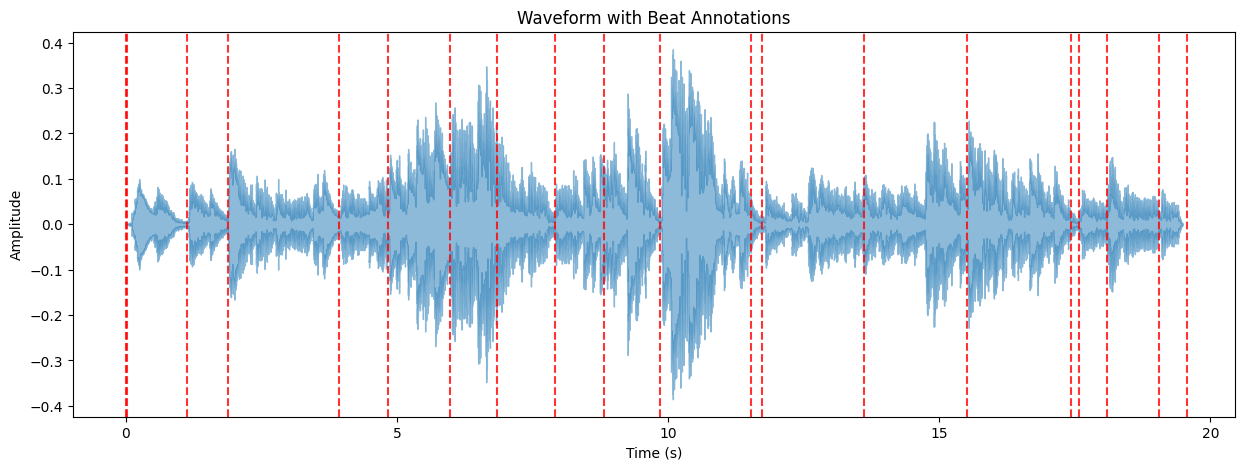

In [91]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(x, sr=sr, alpha=0.5)
beats_timestamps = load_beat_annotations(audio_filename, beat_annotations_folder)
for beat in beats_timestamps:
    plt.axvline(x=beat, color='r', linestyle='--', alpha=0.8)
plt.title("Waveform with Beat Annotations")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


In [92]:
def sonify_beats(beats_timestamps, original_audio, sr):
    """
    Returns a numpy array with the sound of a sine wave at each beat, same length as the input.
    """
    # Shorter sine wave to play at each beat
    sine_wave = numpy.sin(2 * numpy.pi * 2000 * numpy.linspace(0, 0.05, int(sr * 0.05)))  # 0.05 seconds duration

    # Create an empty array with the same length as the original audio
    sonified_audio = numpy.zeros_like(original_audio)

    # Add the sine wave at each beat timestamp
    for beat in beats_timestamps:
        start_sample = int(beat * sr)
        end_sample = start_sample + len(sine_wave)
        if end_sample < len(sonified_audio):
            sonified_audio[start_sample:end_sample] += sine_wave

    # Normalize the audio to prevent clipping
    sonified_audio = numpy.clip(sonified_audio, -1.0, 1.0)

    return sonified_audio


In [93]:
sonified_beats = sonify_beats(beats_timestamps, x, sr)
ipd.Audio(x + 0.25 * sonified_beats , rate=sr)

In [55]:
beats_timestamps[0]

0.373333333

In [56]:
sr

22050

In [57]:
beats_timestamps[0] * sr

8231.99999265

In [94]:
hop_length = 512
beats_timestamps = load_beat_annotations(audio_filename, beat_annotations_folder)
chromagram = librosa.feature.chroma_cqt(y=x, sr=sr, hop_length=hop_length)

# given the cqt chronogram for the audio, go through the beats timestamps and get chroma average values at each beat

In [95]:
import numpy as np

def compute_beat_chroma(chromagram, beats_timestamps, sr, hop_length):
    """
    Computes the average chroma between consecutive beat timestamps.
    
    Parameters
    ----------
    chromagram : np.ndarray
        2D array of shape (12, frames) from librosa.feature.chroma_cqt (or another chroma function).
    beats_timestamps : list of float
        List of beat times (in seconds).
    sr : int
        Sampling rate of the audio.
    hop_length : int
        The hop length used to compute the chromagram.
    
    Returns
    -------
    pd.DataFrame
        A DataFrame where each row represents the average chroma between two consecutive beats.
        The columns include the start/end times of each beat segment, and the 12 mean chroma values.
    """
    # Convert beat times to frame indices
    beat_frames = librosa.time_to_frames(beats_timestamps, sr=sr, hop_length=hop_length)

    # Prepare a list to store results
    results = []

    # Loop through each pair of consecutive beats
    for i in range(len(beat_frames) - 1):
        start_frame = beat_frames[i]
        end_frame   = beat_frames[i + 1]

        # Safeguard against out-of-bounds if last frame goes past chromagram length
        end_frame = min(end_frame, chromagram.shape[1])

        # Slice the chromagram for frames between these two beats
        segment = chromagram[:, start_frame:end_frame]

        # Compute the average across all frames in this segment (axis=1 => across columns)
        mean_chroma = np.mean(segment, axis=1)

        # Store result
        results.append({
            "beat_start_time": beats_timestamps[i],
            "beat_end_time": beats_timestamps[i + 1],
            **{f"chroma_{c}": mean_chroma[c] for c in range(12)}
        })

    # Convert to DataFrame for convenience
    df = pd.DataFrame(results)
    return df

# Usage example:
hop_length = 512
beats_timestamps = load_beat_annotations(audio_filename, beat_annotations_folder)
chromagram = librosa.feature.chroma_cqt(y=x, sr=sr, hop_length=hop_length)

beat_chroma_df = compute_beat_chroma(chromagram, beats_timestamps, sr, hop_length)
beat_chroma_df.head()

/Users/fernando/.pyenv/versions/3.12.8/envs/musicology/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/fernando/.pyenv/versions/3.12.8/envs/musicology/lib/python3.12/site-packages/numpy/_core/_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


,beat_start_time,beat_end_time,chroma_0,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11
0,0.000000,0.021333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.021333,1.130667,0.259359,0.282802,0.341954,0.366381,0.307839,0.353760,0.242299,0.257308,0.347802,0.954594,0.313441,0.267555
2,1.130667,1.877333,0.115152,0.152448,0.163894,0.310157,0.590255,0.145678,0.178464,0.979506,0.264808,0.175111,0.144808,0.140503
3,1.877333,3.925333,0.130942,0.152636,0.758415,0.172206,0.228133,0.570585,0.226362,0.261175,0.288958,0.502793,0.196391,0.125341
4,3.925333,4.842667,0.119560,0.303967,0.259325,0.247522,0.923395,0.346268,0.256795,0.379914,0.534618,0.676552,0.202199,0.172384


In [96]:
import seaborn as sns

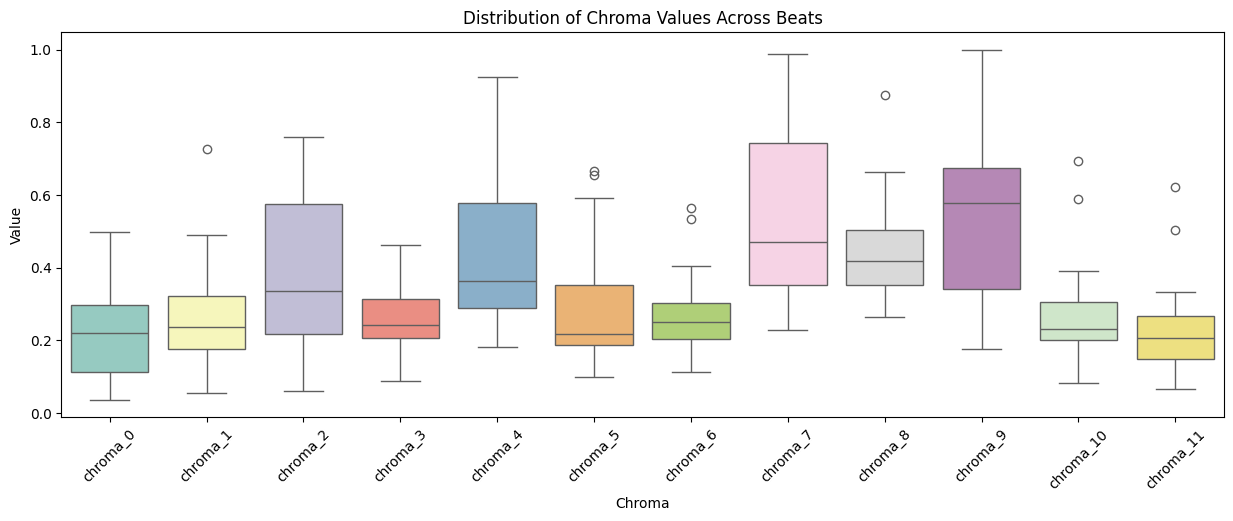

In [97]:
# plot distribution of chroma for all beats
plt.figure(figsize=(15, 5))
sns.boxplot(data=beat_chroma_df.iloc[:, 2:], palette="Set3")
plt.title("Distribution of Chroma Values Across Beats")
plt.xlabel("Chroma")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

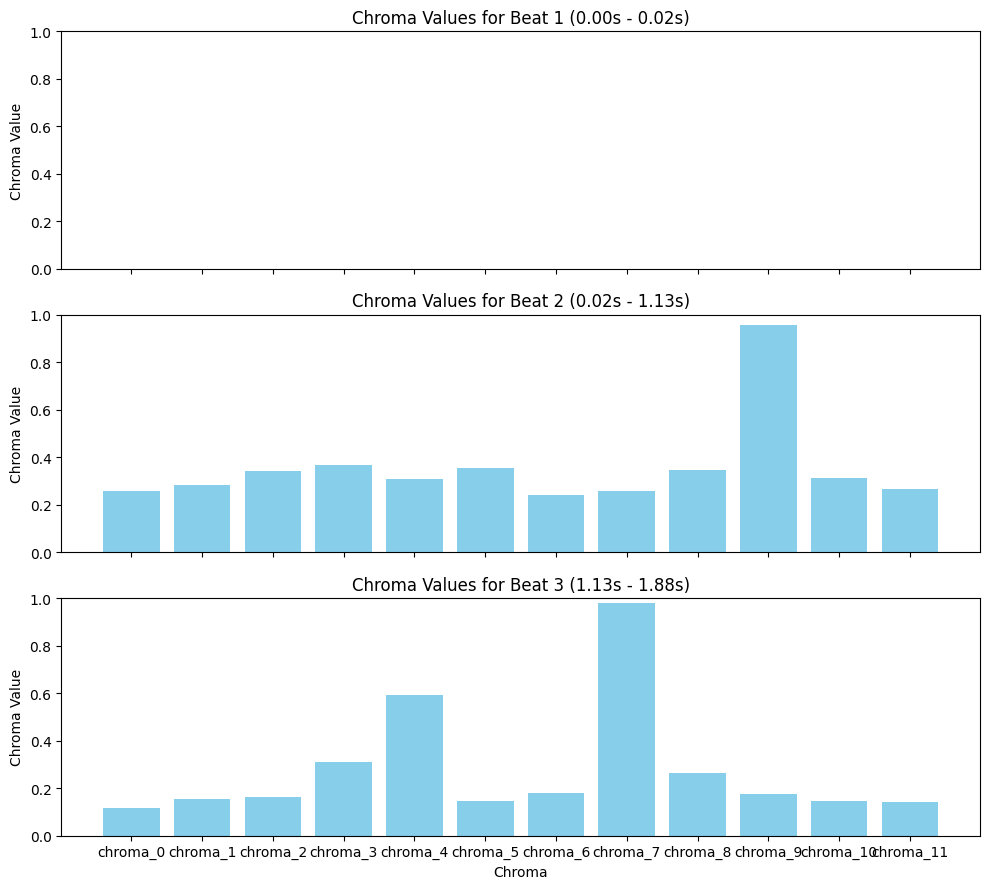

In [107]:
import matplotlib.pyplot as plt

def plot_chroma_bars(beat_chroma_df, n=5):
    """
    Plots bar charts of chroma values for the first n beats.

    Parameters
    ----------
    beat_chroma_df : pd.DataFrame
        DataFrame containing chroma values for each beat.
    n : int
        Number of beats to plot.
    """
    # Limit to the first n beats
    n = min(n, len(beat_chroma_df))
    chroma_columns = [col for col in beat_chroma_df.columns if col.startswith("chroma_")]

    # Create subplots
    fig, axes = plt.subplots(n, 1, figsize=(10, 3 * n), sharex=True)
    if n == 1:
        axes = [axes]  # Ensure axes is iterable for a single subplot

    for i in range(n):
        beat_data = beat_chroma_df.iloc[i]
        axes[i].bar(chroma_columns, beat_data[chroma_columns], color="skyblue")
        axes[i].set_title(f"Chroma Values for Beat {i + 1} ({beat_data['beat_start_time']:.2f}s - {beat_data['beat_end_time']:.2f}s)")
        axes[i].set_ylabel("Chroma Value")
        axes[i].set_ylim(0, 1)  # Adjust based on expected chroma value range

    plt.xlabel("Chroma")
    plt.tight_layout()
    plt.show()

# Usage example:
plot_chroma_bars(beat_chroma_df, n=3)

In [99]:
len(beats_timestamps)

20

In [100]:
beat_chroma_df

,beat_start_time,beat_end_time,chroma_0,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11
0,0.000000,0.021333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.021333,1.130667,0.259359,0.282802,0.341954,0.366381,0.307839,0.353760,0.242299,0.257308,0.347802,0.954594,0.313441,0.267555
2,1.130667,1.877333,0.115152,0.152448,0.163894,0.310157,0.590255,0.145678,0.178464,0.979506,0.264808,0.175111,0.144808,0.140503
3,1.877333,3.925333,0.130942,0.152636,0.758415,0.172206,0.228133,0.570585,0.226362,0.261175,0.288958,0.502793,0.196391,0.125341
4,3.925333,4.842667,0.119560,0.303967,0.259325,0.247522,0.923395,0.346268,0.256795,0.379914,0.534618,0.676552,0.202199,0.172384
5,4.842667,5.973333,0.113503,0.344876,0.484018,0.264499,0.311283,0.197739,0.207059,0.478619,0.418521,0.337631,0.589637,0.177349
6,5.973333,6.848000,0.081328,0.326910,0.135000,0.204269,0.533268,0.126217,0.113149,0.227641,0.452178,0.739939,0.202920,0.120545
7,6.848000,7.914667,0.264454,0.490144,0.242158,0.332667,0.784482,0.191513,0.229829,0.489476,0.415792,0.401725,0.240998,0.503454
8,7.914667,8.810667,0.199695,0.218900,0.719569,0.214286,0.381027,0.590926,0.264680,0.271773,0.343360,0.668187,0.264443,0.265328
9,8.810667,9.856000,0.467772,0.227459,0.358870,0.461876,0.343206,0.225910,0.404980,0.768975,0.499021,0.572969,0.391664,0.229370


In [101]:
chroma_notes_mapping = {
    "chroma_0": "C",
    "chroma_1": "C#",
    "chroma_2": "D",
    "chroma_3": "D#",
    "chroma_4": "E",
    "chroma_5": "F",
    "chroma_6": "F#",
    "chroma_7": "G",
    "chroma_8": "G#",
    "chroma_9": "A",
    "chroma_10": "A#",
    "chroma_11": "B"
}

# Suppose your DataFrame is called df.
# We collect the 12 chroma columns in a list.
chroma_cols = [f"chroma_{i}" for i in range(12)]

def get_top_3_notes(row):
    # Get the three largest values in the row, returns a Series with indices = column names
    top_chroma_cols = row.nlargest(3).index
    # Map column names to note names
    notes = [chroma_notes_mapping[col] for col in top_chroma_cols]
    # Join the notes with dashes, e.g. "C-E-G"
    return "-".join(notes)

# Apply that function row by row and store result in "triad" column
beat_chroma_df["triad"] = beat_chroma_df[chroma_cols].apply(get_top_3_notes, axis=1)

In [102]:
beat_chroma_df

,beat_start_time,beat_end_time,chroma_0,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,triad
0,0.000000,0.021333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C-C#-D
1,0.021333,1.130667,0.259359,0.282802,0.341954,0.366381,0.307839,0.353760,0.242299,0.257308,0.347802,0.954594,0.313441,0.267555,A-D#-F
2,1.130667,1.877333,0.115152,0.152448,0.163894,0.310157,0.590255,0.145678,0.178464,0.979506,0.264808,0.175111,0.144808,0.140503,G-E-D#
3,1.877333,3.925333,0.130942,0.152636,0.758415,0.172206,0.228133,0.570585,0.226362,0.261175,0.288958,0.502793,0.196391,0.125341,D-F-A
4,3.925333,4.842667,0.119560,0.303967,0.259325,0.247522,0.923395,0.346268,0.256795,0.379914,0.534618,0.676552,0.202199,0.172384,E-A-G#
5,4.842667,5.973333,0.113503,0.344876,0.484018,0.264499,0.311283,0.197739,0.207059,0.478619,0.418521,0.337631,0.589637,0.177349,A#-D-G
6,5.973333,6.848000,0.081328,0.326910,0.135000,0.204269,0.533268,0.126217,0.113149,0.227641,0.452178,0.739939,0.202920,0.120545,A-E-G#
7,6.848000,7.914667,0.264454,0.490144,0.242158,0.332667,0.784482,0.191513,0.229829,0.489476,0.415792,0.401725,0.240998,0.503454,E-B-C#
8,7.914667,8.810667,0.199695,0.218900,0.719569,0.214286,0.381027,0.590926,0.264680,0.271773,0.343360,0.668187,0.264443,0.265328,D-A-F
9,8.810667,9.856000,0.467772,0.227459,0.358870,0.461876,0.343206,0.225910,0.404980,0.768975,0.499021,0.572969,0.391664,0.229370,G-A-G#


In [104]:
# 1) Note-to-semitone mapping
note_to_semitone = {
    "C": 0, "C#": 1, "D": 2, "D#": 3,
    "E": 4, "F": 5, "F#": 6, "G": 7,
    "G#": 8, "A": 9, "A#": 10, "B": 11
}

# 2) Build the dictionary of major/minor chord templates
chords_dict = {}
chroma_labels = list(note_to_semitone.keys())
for i, note in enumerate(chroma_labels):
    maj_semitones = {(i) % 12, (i+4) % 12, (i+7) % 12}
    min_semitones = {(i) % 12, (i+3) % 12, (i+7) % 12}
    chords_dict[note]     = maj_semitones
    chords_dict[note+"m"] = min_semitones

# 3) Triad → Chord Name function
def triad_to_chord(triad_str):
    # e.g. "C-E-G"
    notes = triad_str.split("-")
    semitones = {note_to_semitone[n] for n in notes}
    for chord_name, chord_semitones in chords_dict.items():
        if semitones == chord_semitones:
            return chord_name
    return "Unknown"

# Suppose df["triad"] already has your triads (e.g. "C-E-G", "C#-E-G"), etc.
beat_chroma_df["chord"] = beat_chroma_df["triad"].apply(triad_to_chord)

print(beat_chroma_df[["beat_start_time", "triad", "chord"]])

    beat_start_time    triad    chord
0          0.000000   C-C#-D  Unknown
1          0.021333   A-D#-F  Unknown
2          1.130667   G-E-D#  Unknown
3          1.877333    D-F-A       Dm
4          3.925333   E-A-G#  Unknown
5          4.842667   A#-D-G       Gm
6          5.973333   A-E-G#  Unknown
7          6.848000   E-B-C#  Unknown
8          7.914667    D-A-F       Dm
9          8.810667   G-A-G#  Unknown
10         9.856000   D-A-F#        D
11        11.520000   A-G-G#  Unknown
12        11.733333   G-D-G#  Unknown
13        13.610667   A#-E-G  Unknown
14        15.509333   A-F-G#  Unknown
15        17.429333   G#-G-E  Unknown
16        17.578667   G-E-G#  Unknown
17        18.090667   A-G#-G  Unknown
18        19.050667  C#-B-G#  Unknown


In [106]:
# Final dataframe
beat_chroma_df

,beat_start_time,beat_end_time,chroma_0,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,triad,chord
0,0.000000,0.021333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C-C#-D,Unknown
1,0.021333,1.130667,0.259359,0.282802,0.341954,0.366381,0.307839,0.353760,0.242299,0.257308,0.347802,0.954594,0.313441,0.267555,A-D#-F,Unknown
2,1.130667,1.877333,0.115152,0.152448,0.163894,0.310157,0.590255,0.145678,0.178464,0.979506,0.264808,0.175111,0.144808,0.140503,G-E-D#,Unknown
3,1.877333,3.925333,0.130942,0.152636,0.758415,0.172206,0.228133,0.570585,0.226362,0.261175,0.288958,0.502793,0.196391,0.125341,D-F-A,Dm
4,3.925333,4.842667,0.119560,0.303967,0.259325,0.247522,0.923395,0.346268,0.256795,0.379914,0.534618,0.676552,0.202199,0.172384,E-A-G#,Unknown
5,4.842667,5.973333,0.113503,0.344876,0.484018,0.264499,0.311283,0.197739,0.207059,0.478619,0.418521,0.337631,0.589637,0.177349,A#-D-G,Gm
6,5.973333,6.848000,0.081328,0.326910,0.135000,0.204269,0.533268,0.126217,0.113149,0.227641,0.452178,0.739939,0.202920,0.120545,A-E-G#,Unknown
7,6.848000,7.914667,0.264454,0.490144,0.242158,0.332667,0.784482,0.191513,0.229829,0.489476,0.415792,0.401725,0.240998,0.503454,E-B-C#,Unknown
8,7.914667,8.810667,0.199695,0.218900,0.719569,0.214286,0.381027,0.590926,0.264680,0.271773,0.343360,0.668187,0.264443,0.265328,D-A-F,Dm
9,8.810667,9.856000,0.467772,0.227459,0.358870,0.461876,0.343206,0.225910,0.404980,0.768975,0.499021,0.572969,0.391664,0.229370,G-A-G#,Unknown
